In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')

In [ ]:
# old visualization
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
import bokeh
output_notebook()

In [2]:
#read file
top200 = pd.read_csv('BB200.csv')
catalog = pd.read_csv('BBCatalog.csv')

In [3]:
#drop duplicates
print(len(top200))
top200 = top200.drop_duplicates()
print(len(top200))
print(len(catalog))
catalog = catalog.drop_duplicates()
print(len(catalog))

524287
524131
70750
70748


In [4]:
#convert date column from string to date
#top200.date=pd.to_datetime(top200.date)
d1 = np.asarray([datetime.strptime(x,'%m/%d/%Y').date() for x in top200.date])
top200.date = d1
d2 = np.asarray([datetime.strptime(x,'%m/%d/%Y').date() for x in catalog.date])
catalog.date = d2

In [5]:
#create new artist_album ID column
top200['Artist_Album'] = top200.artist + '-' + top200.album
catalog['Artist_Album']=catalog.artist+'-'+catalog.album

#  TOP 200 ANALYSIS

## Weeks at 1

In [6]:
#albums by weeks at 1
topalbums = top200[top200['rank']==1].groupby('Artist_Album').agg({'date':'count'})\
                          .sort_values(by='date',ascending = False)[:10].reset_index()
topalbums.head()

,Artist_Album,date
0,Michael Jackson-Thriller,37
1,Fleetwood Mac-Rumours,31
2,Soundtrack-Saturday Night Fever,24
3,Adele-21,24
4,Prince And The Revolution-Purple Rain (Soundtr...,24


In [7]:
# creating legend for the graph
list_weeksat1 = []
for i,name in enumerate(topalbums.Artist_Album,1):
    list_weeksat1.append(str(i)+': '+name)
index_weeksat1 = ''
for j in range(len(list_weeksat1)):
    index_weeksat1+=list_weeksat1[j] + '\n'
index_weeksat1=index_weeksat1[:-1]
print(index_weeksat1)

1: Michael Jackson-Thriller
2: Fleetwood Mac-Rumours
3: Soundtrack-Saturday Night Fever
4: Adele-21
5: Prince And The Revolution-Purple Rain (Soundtrack)
6: M.C. Hammer-Please Hammer Don't Hurt 'Em
7: Whitney Houston-The Bodyguard
8: Garth Brooks-Ropin' The Wind
9: Soundtrack-Dirty Dancing
10: Billy Ray Cyrus-Some Gave All


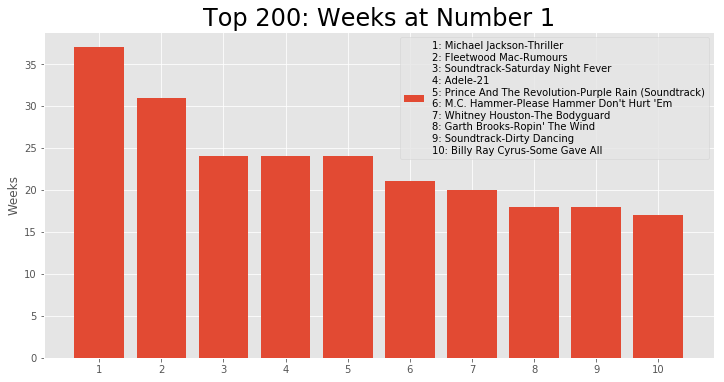

In [8]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,topalbums.date,label=topalbums.Artist_Album)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_weeksat1])
plt.title('Top 200: Weeks at Number 1', fontsize=24)
plt.ylabel('Weeks')
plt.savefig('weeks_at_1.jpg')
plt.show()

In [9]:
#old charting method
source = ColumnDataSource(topalbums)
p = figure(x_range=list(topalbums['Artist_Album']), plot_height=500, title='Weeks at Number 1')
p.vbar(x='Artist_Album',top='date', source=source, width=0.9,color='darkred')
p.xaxis.major_label_orientation = -1/3
p.yaxis.axis_label = "Weeks"
show(p)


## Total Weeks on Chart

In [9]:
#albums that have have spent the most weeks on the chart
topdwellers = top200.groupby(['Artist_Album']).agg({'date':'count'})\
.sort_values(by='date',ascending = False)[:10].reset_index()
topdwellers.head()

,Artist_Album,date
0,Pink Floyd-The Dark Side Of The Moon,927
1,Bob Marley And The Wailers-Legend: The Best Of...,528
2,Journey-Journey's Greatest Hits,518
3,Metallica-Metallica,491
4,Guns N' Roses-Greatest Hits,435


In [10]:
# creating legend for the graph
list_weeksonchart = []
for i,name in enumerate(topdwellers.Artist_Album,1):
    list_weeksonchart.append(str(i)+': '+name)
index_weeksonchart = ''
for j in range(len(list_weeksonchart)):
    index_weeksonchart+=list_weeksonchart[j] + '\n'
index_weeksonchart=index_weeksonchart[:-1]
print(index_weeksonchart)

1: Pink Floyd-The Dark Side Of The Moon
2: Bob Marley And The Wailers-Legend: The Best Of...
3: Journey-Journey's Greatest Hits
4: Metallica-Metallica
5: Guns N' Roses-Greatest Hits
6: Eminem-Curtain Call: The Hits
7: Nirvana-Nevermind
8: Bruno Mars-Doo-Wops & Hooligans
9: Creedence Clearwater Revival Featuring John Fogerty-Chronicle The 20 Greatest Hits
10: Adele-21


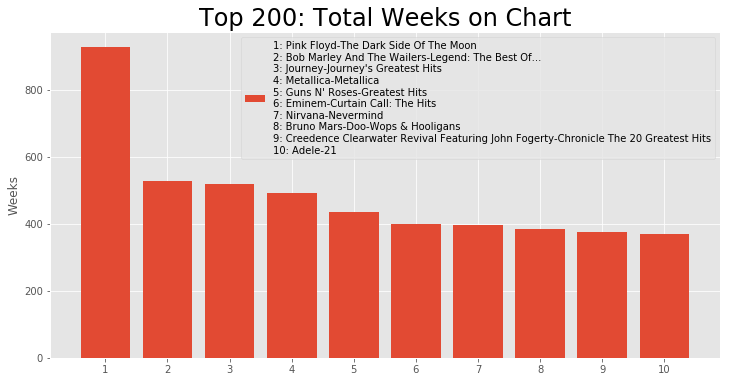

In [11]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,topdwellers.date,label=topdwellers.Artist_Album)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_weeksonchart])
plt.title('Top 200: Total Weeks on Chart', fontsize=24)
plt.ylabel('Weeks')
plt.savefig('weeks_on_chart.jpg')
plt.show()

## Artists with most Number 1s

In [12]:
#artists with most entries reaching number 1
plot0 = top200[top200['rank']==1].groupby('artist').agg({'album':'nunique'})\
.sort_values(by='album',ascending=False)[2:12].reset_index()
plot0.head()

,artist,album
0,JAY-Z,11
1,Bruce Springsteen,11
2,Barbra Streisand,9
3,Garth Brooks,9
4,The Beatles,9


In [13]:
# creating legend for the graph
list_artists1 = []
for i,name in enumerate(plot0.artist,1):
    list_artists1.append(str(i)+': '+name)
# print(list_weeksat1)
index_artists1 = ''
for j in range(len(list_artists1)):
    index_artists1+=list_artists1[j] + '\n'
index_artists1=index_artists1[:-1]
print(index_artists1)

1: JAY-Z
2: Bruce Springsteen
3: Barbra Streisand
4: Garth Brooks
5: The Beatles
6: Kenny Chesney
7: Madonna
8: The Rolling Stones
9: U2
10: Eminem


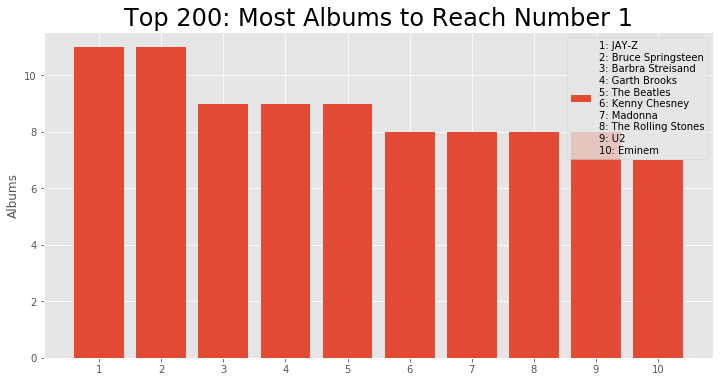

In [14]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,plot0.album,label=plot0.artist)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_artists1])
plt.title('Top 200: Most Albums to Reach Number 1', fontsize=24)
plt.ylabel('Albums')
plt.savefig('albums_at_1_by_artist.jpg')
plt.show()

In [199]:
# old charting method
source = ColumnDataSource(plot0)
p = figure(x_range=list(plot0['artist']), title = "Most Albums to Reach #1",plot_height=500)
p.vbar(x='artist', top='album', source=source, width=0.9, color='darkred')
p.xaxis.major_label_orientation = -1/3
show(p)

## Artists with most charting albums

In [15]:
#artists with most entries on top200
plot1 = top200.groupby('artist').agg({'album':'nunique'})\
.sort_values([('album')],ascending=False)[2:12].reset_index()
plot1.head()

,artist,album
0,Elvis Presley,101
1,Grateful Dead,86
2,Bob Dylan,63
3,Willie Nelson,56
4,Original Broadway Cast Recording,54


In [16]:
# creating legend for the graph
list_artistsalbums = []
for i,name in enumerate(plot1.artist,1):
    list_artistsalbums.append(str(i)+': '+name)
index_artistsalbums = ''
for j in range(len(list_artistsalbums)):
    index_artistsalbums+=list_artistsalbums[j] + '\n'
index_artistsalbums=index_artistsalbums[:-1]
print(index_artistsalbums)

1: Elvis Presley
2: Grateful Dead
3: Bob Dylan
4: Willie Nelson
5: Original Broadway Cast Recording
6: Neil Diamond
7: Barbra Streisand
8: Kidz Bop Kids
9: The Beatles
10: Original Cast


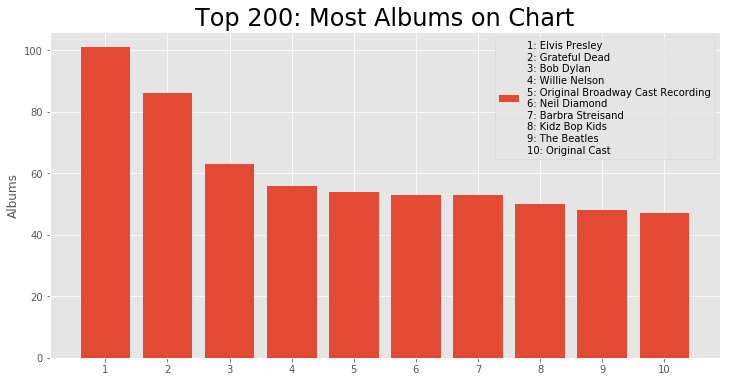

In [17]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,plot1.album,label=plot1.artist)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_artistsalbums])
plt.title('Top 200: Most Albums on Chart', fontsize=24)
plt.ylabel('Albums')
plt.savefig('albums_on_chart_by_artist.jpg')
plt.show()

## Plotting Top Album Chart Position - Thriller

In [60]:
# Thriller Data
thriller = top200[top200['album']=='Thriller'].sort_values(by='date')
thrillerstart = thriller.iloc[0,2]

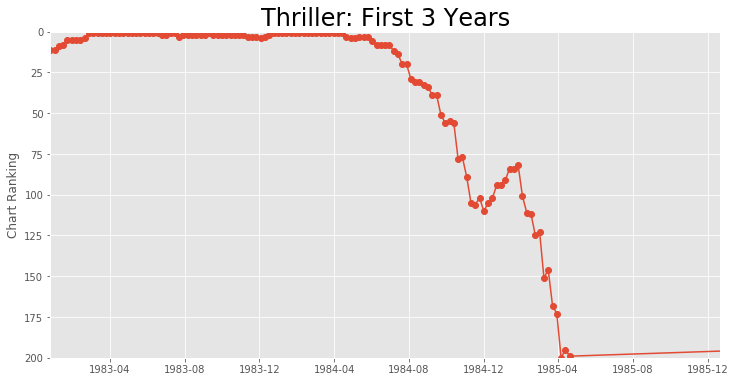

In [74]:
# Thriller Plot
plt.figure(figsize=(12,6))
plt.plot(thriller['date'].values, thriller['rank'].values, marker='o')
plt.xlim(thrillerstart,thrillerstart+timedelta(weeks=156))
plt.ylim(200,0)
plt.title('Thriller: First 3 Years',fontsize=24)
plt.ylabel('Chart Ranking')
plt.savefig('Thriller_3years.jpg')
plt.show()

## Plotting Top Album Chart Position - Dark Side of the Moon

In [64]:
# Dark Side of the Moon data
darkmoon = top200[top200['album']=='The Dark Side Of The Moon'].sort_values(by='date')
darkstart = darkmoon.iloc[0,2]

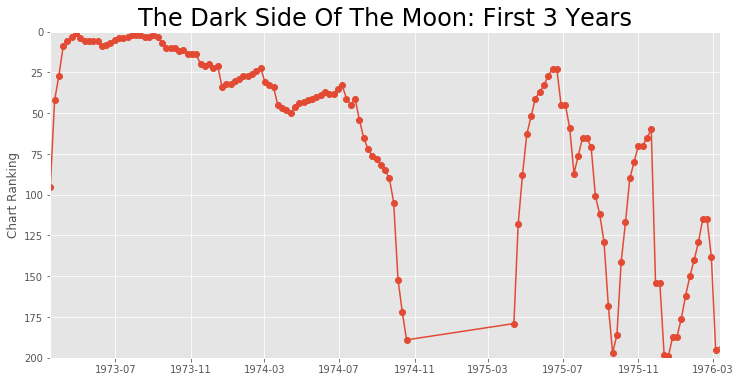

In [75]:
# Plotting Dark Side of the Moon
plt.figure(figsize=(12,6))
plt.plot(darkmoon['date'].values, darkmoon['rank'].values, marker='o')
plt.xlim(darkstart,darkstart+timedelta(weeks=156))
plt.ylim(200,0)
plt.title('The Dark Side Of The Moon: First 3 Years',fontsize=24)
plt.ylabel('Chart Ranking')
plt.savefig('DarkSideMoon_3years.jpg')
plt.show()

In [237]:
top200[top200['album']=='Thriller'].sort_values(by='date')
source = ColumnDataSource(top200[top200['album']=='Thriller'].sort_values(by='date')[:104])
p = figure(y_range=(200,1), plot_width=500, plot_height=400,x_axis_type="datetime", title="Thriller: First 2 Years")
p.circle('date','rank',source=source,size=3,color='black')
p.line('date','rank',source=source,color='darkred')
p.yaxis.axis_label = "Chart Ranking"
show(p)

In [234]:
top200[top200['album']=='The Dark Side Of The Moon'].sort_values(by='date')
source = ColumnDataSource(top200[top200['album']=='The Dark Side Of The Moon'].sort_values(by='date')[:104])
p = figure(y_range=(200,1), plot_width=500, plot_height=400,x_axis_type="datetime", title="Dark Side Of The Moon: First 2 Years")
p.circle('date','rank',source=source,size=3,color='black')
p.line('date','rank',source=source,color='darkred')
p.yaxis.axis_label = "Chart Ranking"
show(p)

# CATALOG ANALYSIS

## Most Weeks as 1 on Catalog Chart

In [76]:
# data
plot2 = catalog[catalog['rank']==1].groupby('Artist_Album').agg({'date':'count'})\
.sort_values('date',ascending=False)[:10].reset_index()

In [78]:
# creating legend for the graph
list_catalogweeks = []
for i,name in enumerate(plot2.Artist_Album,1):
    list_catalogweeks.append(str(i)+': '+name)
index_catalogweeks = ''
for j in range(len(list_catalogweeks)):
    index_catalogweeks+=list_catalogweeks[j] + '\n'
index_catalogweeks=index_catalogweeks[:-1]
print(index_catalogweeks)

1: Bob Marley And The Wailers-Legend: The Best Of...
2: Creed-My Own Prison
3: Soundtrack-Grease
4: Metallica-Metallica
5: Adele-19
6: Eric Clapton-Time Pieces -- The Best Of Eric Clapton
7: Michael Jackson-Number Ones
8: Kenny G-Miracles: The Holiday Album
9: Beastie Boys-Licensed To Ill
10: Johnny Cash-16 Biggest Hits


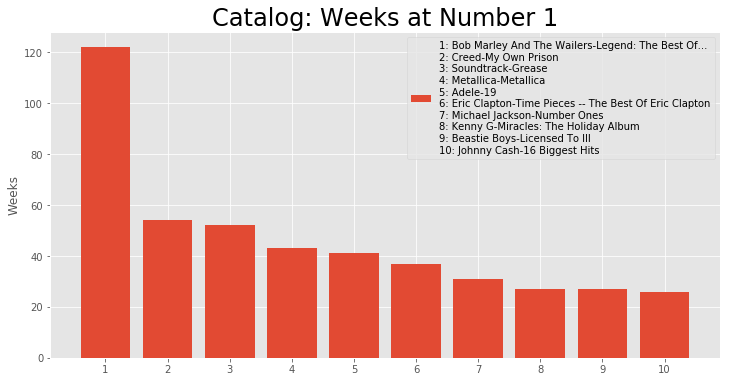

In [82]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,plot2.date,label=plot2.Artist_Album)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_catalogweeks])
plt.title('Catalog: Weeks at Number 1', fontsize=24)
plt.ylabel('Weeks')
plt.savefig('catalog_weeksat1.jpg')
plt.show()

## Most Appearances on Catalog Chart

In [83]:
# data
plot3 = catalog.groupby('Artist_Album').agg({'date':'count'}).sort_values('date',ascending=False)[:10].reset_index()

In [84]:
# creating legend for the graph
list_catalogapps = []
for i,name in enumerate(plot3.Artist_Album,1):
    list_catalogapps.append(str(i)+': '+name)
index_catalogapps = ''
for j in range(len(list_catalogapps)):
    index_catalogapps+=list_catalogapps[j] + '\n'
index_catalogapps=index_catalogapps[:-1]
print(index_catalogapps)

1: Bob Marley And The Wailers-Legend: The Best Of...
2: Pink Floyd-The Dark Side Of The Moon
3: Journey-Journey's Greatest Hits
4: Creedence Clearwater Revival Featuring John Fogerty-Chronicle The 20 Greatest Hits
5: AC/DC-Back In Black
6: Metallica-Metallica
7: Bob Seger & The Silver Bullet Band-Greatest Hits
8: James Taylor-Greatest Hits
9: Tom Petty And The Heartbreakers-Greatest Hits
10: Queen-Greatest Hits


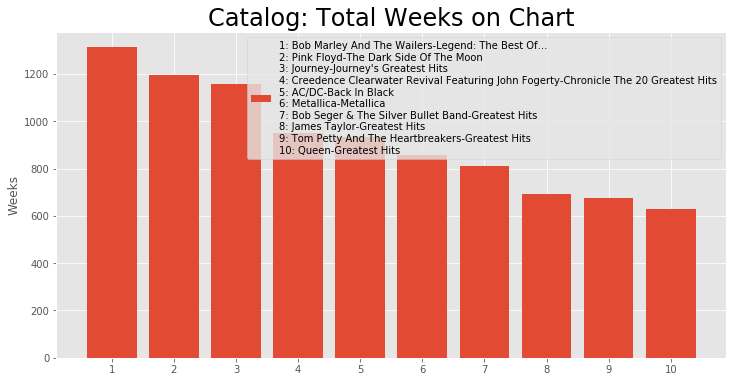

In [86]:
# graph
plt.figure(figsize=(12,6))
index = np.arange(10)
plt.bar(index,plot3.date,label=plot3.Artist_Album)
plt.xticks(range(10),range(1,11))
plt.legend(loc=0)
plt.legend([index_catalogapps])
plt.title('Catalog: Total Weeks on Chart', fontsize=24)
plt.ylabel('Weeks')
plt.savefig('catalog_weeksonchart.jpg')
plt.show()

# CROSS ANALYSIS

In [266]:
joined = top200.merge(catalog, on='Artist_Album', how='inner')
len(joined.groupby('Artist_Album')\
.agg({'album_x':'count','rank_x':['min','max'],'date_x':['min','max'],'rank_y':['min','max'],'date_y':['min','max']})\
.sort_values([('album_x','count')],ascending=True))

2020

In [281]:
antij = pd.merge(top200, catalog, on='Artist_Album', how='outer', indicator=True).query('_merge == "right_only"')

4077

In [ ]:
antij = antij.groupby('Artist_Album').agg({'date_y':['count','min','max'],'rank_y':['min','max','mean']})\
.sort_values([('date_y','count')],ascending=False)

In [310]:
len(antij[antij['date_y']['max']>datetime(2010,1,1).date()])

67

In [296]:
antij.head()

date_y              \
                                                    count         min   
Artist_Album                                                            
Patsy Cline-12 Greatest Hits                          290  1991-05-25   
Lynyrd Skynyrd-Skynyrd's Innyrds/Their Greatest...    198  1991-07-27   
Miles Davis-Kind Of Blue                              173  1997-06-14   
Poison-Greatest Hits 1986--1996                       124  1999-02-06   
The Police-Every Breath You Take - The Singles        110  1991-06-08   

                                                               rank_y        \
                                                           max    min   max   
Artist_Album                                                                  
Patsy Cline-12 Greatest Hits                        2003-11-15    6.0  50.0   
Lynyrd Skynyrd-Skynyrd's Innyrds/Their Greatest...  1999-02-27   11.0  50.0   
Miles Davis-Kind Of Blue                            2015-10-24    2.0  50.0   
Poison-Greatest Hits 1986--1996                     2005-05-07    2.0  50.0   
The Police-Every Breath You Take - The Singles      1994-02-12   23.0  50.0   

                                                               
                                                         mean  
Artist_Album                                                   
Patsy Cline-12 Greatest Hits                        26.868966  
Lynyrd Skynyrd-Skynyrd's Innyrds/Their Greatest...  35.323232  
Miles Davis-Kind Of Blue                            32.069364  
Poison-Greatest Hits 1986--1996                     36.250000  
The Police-Every Breath You Take - The Singles      35.536364

In [275]:
top200.Artist_Album.nunique()

34486

In [276]:
catalog.Artist_Album.nunique()

2368

In [ ]:
# there should be 2368-2020 = 348 unique albums on the anti-join

In [279]:
2020/2368*100

85.30405405405406

In [ ]:
# IDEA: create a table 

In [68]:
#albums by number of weeks within top 10
top200[top200['rank']<=10].groupby("Artist_Album").agg({'date':'count'}).sort_values(by='date',ascending = False)[:10]

,date
Artist_Album,
Bruce Springsteen-Born In The U.S.A.,84
Adele-21,82
Michael Jackson-Thriller,78
Def Leppard-Hysteria,78
Alanis Morissette-Jagged Little Pill,72
Paula Abdul-Forever Your Girl,64
Celine Dion-Falling Into You,61
Taylor Swift-1989,59
Lionel Richie-Can't Slow Down,59


In [85]:
#artists and their peak rank
chartboys=top200.groupby("artist").agg({'album':'nunique','rank':'min'}).sort_values('album',ascending=False)
#proportion of artists who have at least 1 album peak: 4.9%
print(len(chartboys[chartboys['rank']==1])/len(chartboys)*100)
#proportion of artists with at least 5 entries and did rank 1: ~19%
chartboys[(chartboys['album']>=5) & (chartboys['rank']==1)]
len(chartboys[(chartboys['album']>=5) & (chartboys['rank']==1)]) / len(chartboys[chartboys['album']>=5])*100
# IDEA: create a table with 3 columns: min no. of entries on poll, avg of artists that peaked at 1,avg to make top 10
# IDEA: create a table with 3 columns: exact no. of entries on poll, avg of artists that peaked at 1, avg to make top 10

4.8915945743885505


0.18970047293746717

In [100]:
#albums and their peak rank
chartgirls=top200.groupby("Artist_Album").agg({'rank':['min','count']}).sort_values([('rank','min')],ascending=True)
# avg number of weeks on the charts for an album that peaks at 1: 64
chartgirls[chartgirls[('rank','min')]==1][('rank','count')].mean()
# avg number of weeks at number 1: 2.623
top200[top200['rank']==1].groupby('Artist_Album').agg({'date':'count'}).sort_values('date',ascending=False).mean()

date    2.623377
dtype: float64

In [123]:
a=list(chartgirls[chartgirls[('rank','min')]==1].index)
#only the albums that have reached number 1
top200[top200['Artist_Album'].isin(a)]
#weeks on chart for albums that have reached 1
top200[top200['Artist_Album'].isin(a)].groupby('Artist_Album').agg({'artist':'min','date':'count'}).sort_values(by='date',ascending=False)

,artist,date
Artist_Album,,
Pink Floyd-The Dark Side Of The Moon,Pink Floyd,927
Metallica-Metallica,Metallica,491
Eminem-Curtain Call: The Hits,Eminem,399
Nirvana-Nevermind,Nirvana,397
Adele-21,Adele,370
Eminem-The Eminem Show,Eminem,352
Michael Jackson-Thriller,Michael Jackson,331
The Beatles-1,The Beatles,326
Carole King-Tapestry,Carole King,318


In [128]:
len(top200['date'].unique())

2626

In [ ]:
top200[top200['artist']=='The Beatles'].groupby('album').agg('count').head()